In [1]:
import pandas as pd
from modules.get_df_info import get_top10_per_col, get_engagement_clusters, get_kmeans_k
from modules.create_viz import create_app_traffic_viz

## Read saved aggregated data from data directory

In [2]:
df = pd.read_csv('./data/telco_agg.csv')

## Slice data to get the data for the task

In [3]:
task2_raw = df.copy()[['MSISDN/Number', 'num_xDR_sess', 'Dur. (ms)', 'Tot_DL_UL (Bytes)']]

In [4]:
task2_raw_agg = task2_raw.copy().set_index('MSISDN/Number')

## Get top 10 per metric

In [6]:
top10_dict = get_top10_per_col(df=task2_raw_agg, top_num=10)

Retrieving columns info...
Retrieving the top 10 from num_xDR_sess
Retrieving the top 10 from Dur. (ms)
Retrieving the top 10 from Tot_DL_UL (Bytes)
Process completed


## Save top users 

In [7]:
top10_users_engaement = pd.DataFrame(top10_dict)
top10_users_engaement.to_csv('./data/top10_users_engaement.csv')

## Classifying customers into 3 groups

Standardizing input
Initializing KMeans Classifier
Classifying....
Creating plots for classified groups...
Plot saved as classified_customers_engagement.jpg in img directory


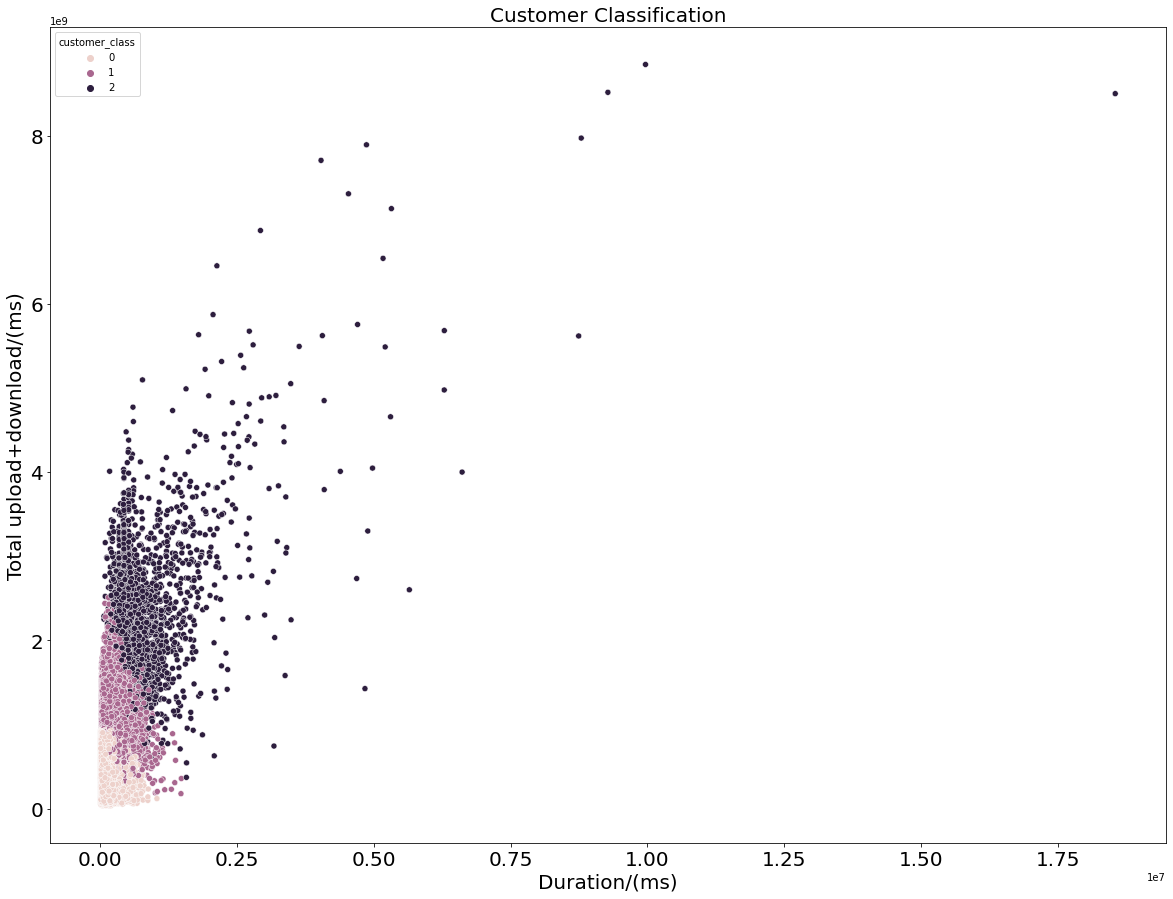

In [8]:
classified_df = get_engagement_clusters(df= task2_raw_agg ,filename = 'classified_customers_engagement.jpg', n_clusters=3)

## Get the descriptive statiscis of each class

In [9]:
class_df_dict = {}

for col in classified_df['customer_class'].unique():
    class_df_dict[col] = {'info':classified_df[classified_df.columns[:-1]][classified_df['customer_class'] == col].describe()}
    
for i in class_df_dict:
    save_ = './data/engagement_class_'+str(i)+'_desc.csv'
    class_df_dict[i]['info'].to_csv(save_)

## Get top 10 most engaged users per application

In [10]:
app_cols = ['MSISDN/Number','Tot_DL_UL (Bytes)','Social Media total data (Bytes)','Youtube total data (Bytes)',
            'Netflix total data (Bytes)','Google total data (Bytes)','Email total data (Bytes)',
            'Gaming total data (Bytes)','Other total data (Bytes)']

In [11]:
traffic_df_per_app = df.copy()[app_cols].set_index('MSISDN/Number')

In [12]:
top10_user_per_app_dict = get_top10_per_col(df=traffic_df_per_app, top_num=10)

Retrieving columns info...
Retrieving the top 10 from Tot_DL_UL (Bytes)
Retrieving the top 10 from Social Media total data (Bytes)
Retrieving the top 10 from Youtube total data (Bytes)
Retrieving the top 10 from Netflix total data (Bytes)
Retrieving the top 10 from Google total data (Bytes)
Retrieving the top 10 from Email total data (Bytes)
Retrieving the top 10 from Gaming total data (Bytes)
Retrieving the top 10 from Other total data (Bytes)
Process completed


## Save top users per app

In [23]:
top10_users_per_app = pd.DataFrame(top10_user_per_app_dict)
top10_users_per_app.to_csv('./data/top10_users_per_app.csv', index=True)

## Get app traffic 

In [14]:
app_traffic_dict = {col.split(' ')[0]:traffic_df_per_app[col].sum() for col in traffic_df_per_app.columns[1:]}

app_traffic_dict_transpose = {'App':app_traffic_dict.keys(), 'Total Traffic (Bytes)':app_traffic_dict.values()}

app_traffic_df = pd.DataFrame(app_traffic_dict_transpose).set_index('App')

app_traffic_sorted_df = app_traffic_df.sort_values(by='Total Traffic (Bytes)', ascending=False).reset_index()

## Save app traffic 

In [15]:
app_traffic_sorted_df.to_csv('./data/app_traffic_sorted_df.csv')

In [16]:
app_traffic_sorted_df

,App,Total Traffic (Bytes)
0,Gaming,6.408892e+13
1,Other,6.395425e+13
2,Youtube,3.372204e+12
3,Netflix,3.370060e+12
4,Google,1.162853e+12
5,Email,3.364677e+11
6,Social,2.722655e+11


## Plot top 3 most used app

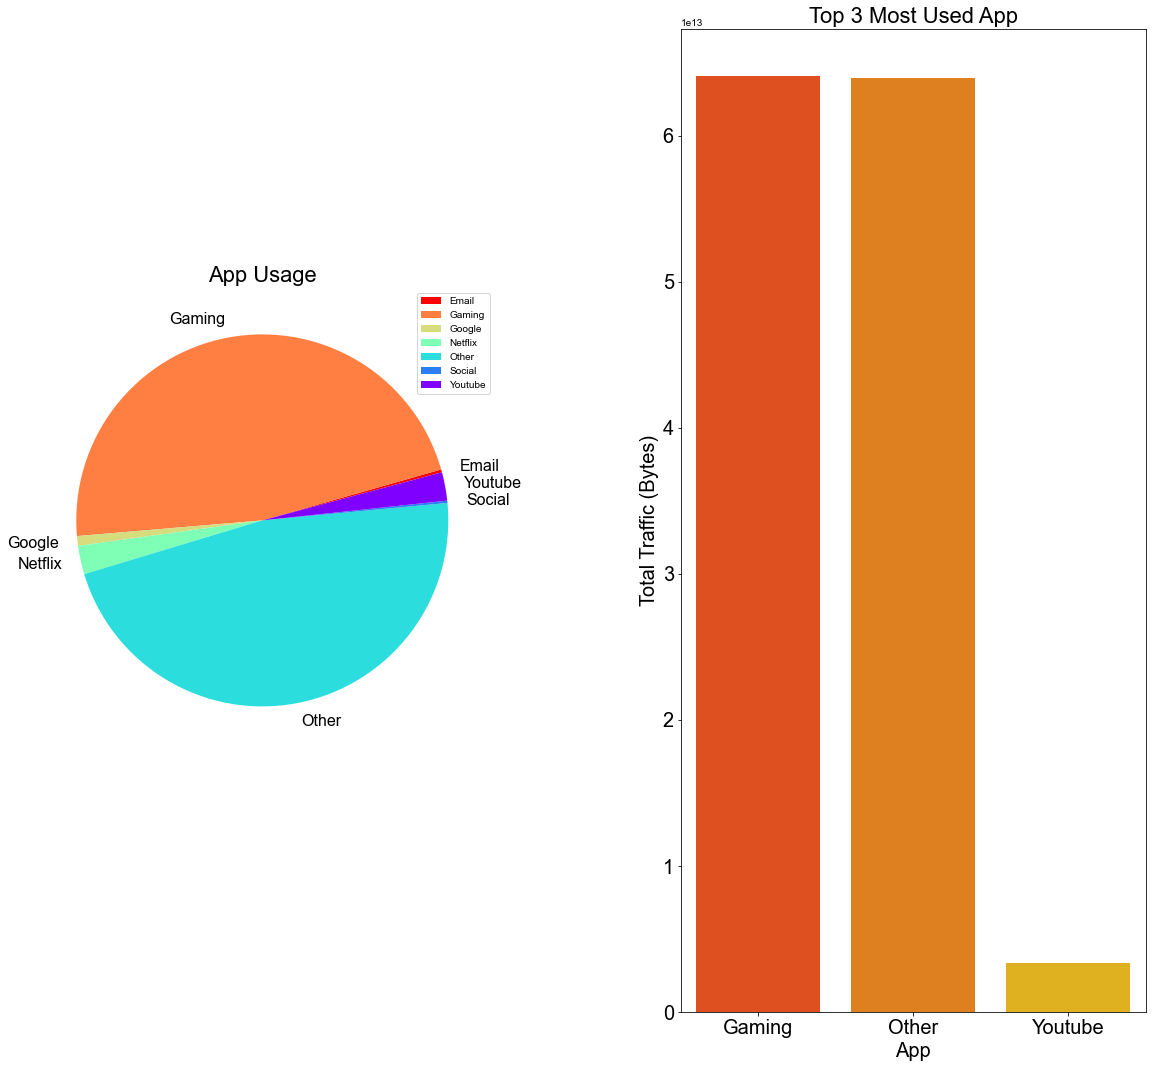

In [17]:
create_app_traffic_viz(df=app_traffic_sorted_df, filename='ap_traffic_viz.jpg')

## Group users in k engagement clusters based on the engagement metrics (elbow method)

Standardizing input
Initializing KMeans Classifier
Classifying....
Evaluating k=1 values....
Classifying....
Evaluating k=2 values....
Classifying....
Evaluating k=3 values....
Classifying....
Evaluating k=4 values....
Classifying....
Evaluating k=5 values....
Classifying....
Evaluating k=6 values....
Classifying....
Evaluating k=7 values....
Classifying....
Evaluating k=8 values....
Classifying....
Evaluating k=9 values....
Evaluation completed.
Ploting started
Plotting Completed, file saved in img directory as elbow_viz.jpg


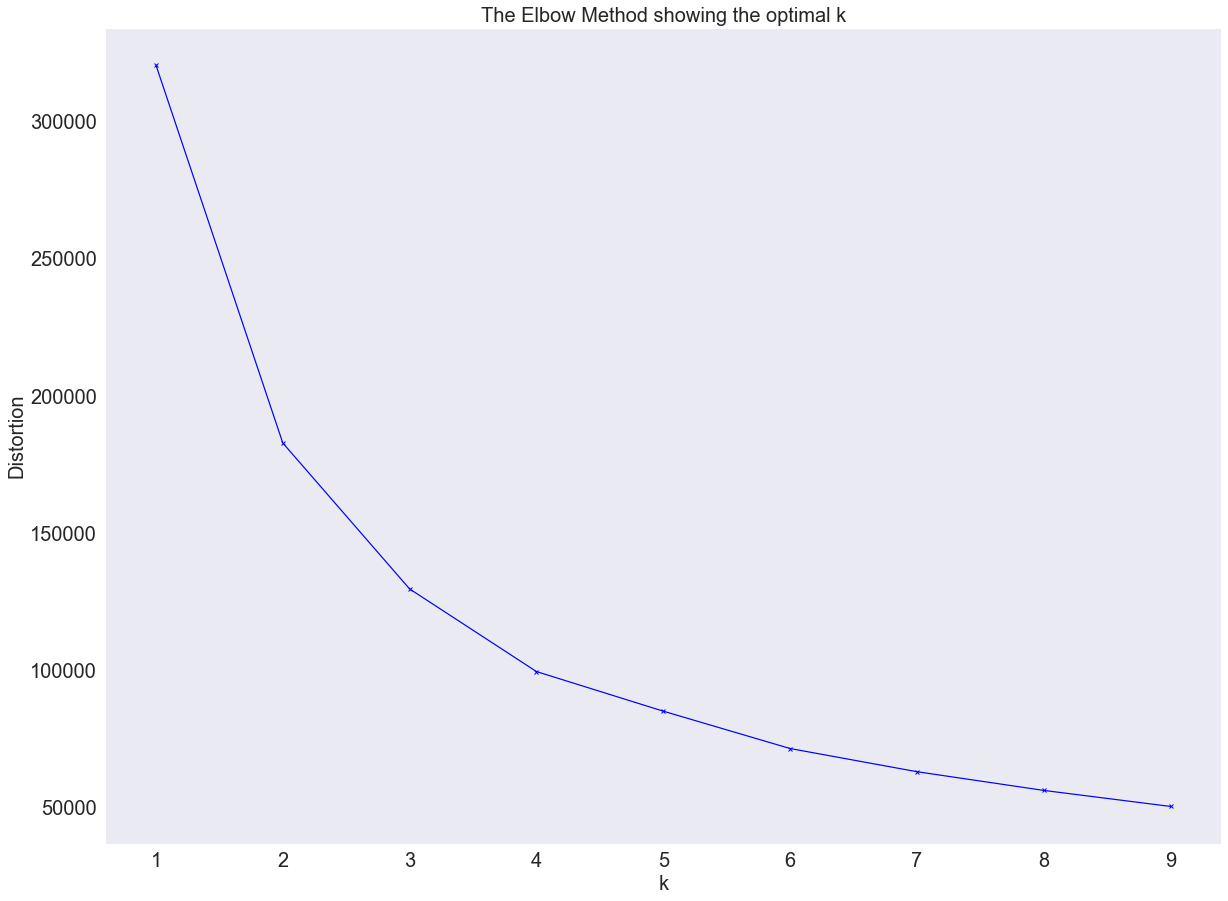

In [19]:
get_kmeans_k(df=task2_raw_agg, filename='elbow_viz.jpg')

## Reclassifying using optimal K 

Standardizing input
Initializing KMeans Classifier
Classifying....
Creating plots for classified groups...
Plot saved as classified_customers_engagement_optimal.jpg in img directory


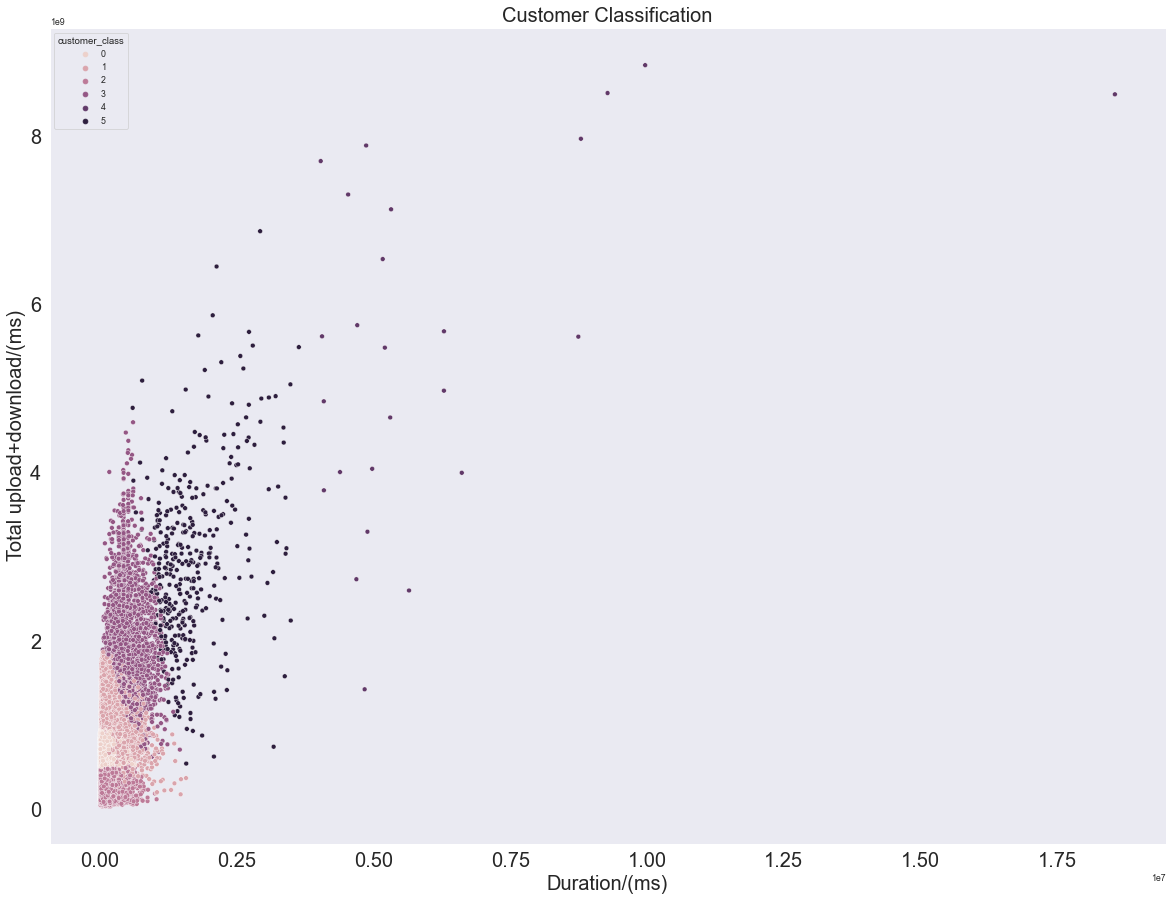

In [22]:
classified_df = get_engagement_clusters(df= task2_raw_agg ,filename = 'classified_customers_engagement_optimal.jpg', n_clusters=6)